# P2 submission

More info on the dataset [here](https://github.com/epfl-dlab/when_sheep_shop/tree/master/data)

**Project proposal**

Best breweries in the world 

The idea behind the identification of the best breweries is that the consumer might be more interested to try new and/or original products that come from a good brewery. This ranking is based on the ratings given by the tasters, but the ratings have to be weighted by the number of ratings for the best beers, the quality and emotions transmitted in the text following the different ratings. Some ratings might be biased or unclear so some of them might have to be filtered. Once the ranking is determined a visualisation is to be created to convey properly the attributes of the best breweries (number of “quality” beers, rankings by styles).

*Feedback*

Find and visualize the best breweries - clarity: 75 - creativity: 75 - feasibility: 75, using beer-level reviews as a proxy for brewery reviews is doable, yet will require detailed analysis. 

# Beer reviews EDA

This dataset consists of beer reviews from two Beer rating websites: BeerAdvocate and RateBeer, for a period of 17 years ranging from 2001 to 2017.

Metadata about users, beers, and breweries (CSV)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
websites = ['BeerAdvocate', 'RateBeer']

# BeerAdvocate & RateBeer

In [4]:
# BeerAdvocate
beers_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/beers.csv")
breweries_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/breweries.csv")
users_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/users.csv")

# RateBeer
beers_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/beers.csv")
breweries_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/breweries.csv")
users_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/users.csv")

In [5]:
def split_website(website):
    if website == 'BA':
        beers = beers_BA
        breweries = breweries_BA
        users = users_BA
    else:
        beers = beers_RB
        breweries = breweries_RB
        users = users_RB
    return beers, breweries, users

In [6]:
comparison_csv = pd.DataFrame(index = ['beers.csv','breweries.csv','users.csv'], columns = ['length BA', '# unique (based on ID) in BA', 'length RB', '# unique (based on ID) in RB', '# columns BA','# columns RB', '# columns in common'])
comparison_csv['length BA'] = [len(beers_BA), len(breweries_BA), len(users_BA)]
comparison_csv['length RB'] = [len(beers_RB), len(breweries_RB), len(users_RB)]

comparison_csv['# unique (based on ID) in BA'] = [len(beers_BA['beer_id'].unique()), len(breweries_BA['id'].unique()), len(users_BA['user_id'].unique())]
comparison_csv['# unique (based on ID) in RB'] = [len(beers_RB['beer_id'].unique()), len(breweries_RB['id'].unique()), len(users_RB['user_id'].unique())]

comparison_csv['# columns BA'] = [len(beers_BA.columns), len(breweries_BA.columns), len(users_BA.columns)]
comparison_csv['# columns RB'] = [len(beers_RB.columns), len(breweries_RB.columns), len(users_RB.columns)]

comparison_csv['# columns in common'] = [len(set(beers_BA.columns).intersection(set(beers_RB.columns))), 
                                        len(set(breweries_BA.columns).intersection(set(breweries_RB.columns))),
                                        len(set(users_BA.columns).intersection(set(users_RB.columns)))]
comparison_csv.head()

,length BA,# unique (based on ID) in BA,length RB,# unique (based on ID) in RB,# columns BA,# columns RB,# columns in common
beers.csv,280823,280823,442081,442081,15,14,12
breweries.csv,16758,16758,24189,24189,4,4,4
users.csv,153704,153704,70174,70120,6,5,5


In [7]:
beers_col_in_BA_not_in_RB = set(beers_BA.columns) - set(beers_BA.columns).intersection(set(beers_RB.columns))
beers_col_in_RB_not_in_BA = set(beers_RB.columns) - set(beers_BA.columns).intersection(set(beers_RB.columns))
print('Beers :')
print(f'columns in BA but not in RB: {beers_col_in_BA_not_in_RB}')
print(f'columns in RB but not in BA: {beers_col_in_RB_not_in_BA}')

users_col_in_BA_not_in_RB = set(users_BA.columns) - set(users_BA.columns).intersection(set(users_RB.columns))
users_col_in_RB_not_in_BA = set(users_RB.columns) - set(users_BA.columns).intersection(set(users_RB.columns))
print('Users :')
print(f'columns in BA but not in RB: {users_col_in_BA_not_in_RB}')
print(f'columns in RB but not in BA: {users_col_in_RB_not_in_BA}')

Beers :
columns in BA but not in RB: {'nbr_reviews', 'ba_score', 'bros_score'}
columns in RB but not in BA: {'style_score', 'overall_score'}
Users :
columns in BA but not in RB: {'nbr_reviews'}
columns in RB but not in BA: set()


## Comparison of beers

Questions :
- Do some beers have more ratings than others ?
- Do the websites have beers in common (look at the beer_id) ?

LINK beers-breweries-users:
- What are the styles of the beers in each website and each location ?
- What are the favorite styles of beers per country ? (look at the ratings)
- Are there some country better at making good beers ?
- **Is there a link between the people's tastes and the origin of the beers ? Does it change across countries ?**
- **Is there a link between the people's tastes and the style of the beers ? Does it change across countries ?**
- **Do some country prefer beers based on country or based on style ?**

In [8]:
beers_BA.head(1)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN


In [9]:
beers_RB.head(1)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.0,NaN,0,NaN


In [10]:
print(beers_BA.columns)
print(beers_RB.columns)

Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'overall_score', 'style_score', 'avg', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')


## Comparison of breweries

Questions :
- What are the breweries location on each website ?
- Do the websites have breweries in common ?
- How many different beers each breweries produce ?
- Do some country produce more different kind of beers than others ? (link between location and variety of beers)

In [11]:
breweries_BA.head(1)

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5


In [12]:
breweries_RB.head(1)

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3


In [13]:
print(f'Number of different locations in AB - RB : {len(breweries_BA["location"].unique())} - {len(breweries_RB["location"].unique())}')
print(f'Number of breweries in AB and RB (based on id) : {len(set(breweries_BA["id"]).intersection(set(breweries_RB["id"])))}')
print(f'Number of breweries in AB and RB (based on name) : {len(set(breweries_BA["name"]).intersection(set(breweries_RB["name"])))}')

Number of different locations in AB - RB : 297 - 267
Number of breweries in AB and RB (based on id) : 7094
Number of breweries in AB and RB (based on name) : 6003


## Comparison of users

Questions :
- where are users from on each website ?
- are they some users on both websites (look at the IDs) ?
- Is there more reviews on one website (look at nbr_ratings) ?
- Is there a link between the location and the number of ratings ?
- What is `joined` ?

In [14]:
users_BA.head(1)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"


In [15]:
users_RB.head(1)

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland


In [16]:
# sort group united states together
print(f'Number of users\' origin  in AB - RB : {len(users_BA["location"].unique())} - {len(users_RB["location"].unique())}')

print(f'Number of users in AB and RB (based on user_id) : {len(set(users_BA["user_id"]).intersection(set(users_RB["user_id"])))}')
print(f'Number of users in AB and RB (based on user_name) : {len(set(users_BA["user_name"]).intersection(set(users_RB["user_name"])))}')

Number of users' origin  in AB - RB : 195 - 223
Number of users in AB and RB (based on user_id) : 0
Number of users in AB and RB (based on user_name) : 4349


In [17]:
# fig, axs = plt.subplots(1,2)
# sns.histplot(users_BA['nbr_ratings'], ax = axs[0])
# axs[0].set_title("Distrib. nbr_ratings for users_BA")
# sns.histplot(users_RB['nbr_ratings'], ax = axs[1])
# axs[1].set_title("Distrib. nbr_ratings for users_RB")

# Match beer data

In [18]:
# 1st line of csv : ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,scores,scores
beers_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/beers.csv", header=1)
print(beers_matched.columns)
beers_matched.head(3)

Index(['abv', 'avg', 'avg_computed', 'avg_matched_valid_ratings', 'ba_score',
       'beer_id', 'beer_name', 'beer_wout_brewery_name', 'brewery_id',
       'brewery_name', 'bros_score', 'nbr_matched_valid_ratings',
       'nbr_ratings', 'nbr_reviews', 'style', 'zscore', 'abv.1', 'avg.1',
       'avg_computed.1', 'avg_matched_valid_ratings.1', 'beer_id.1',
       'beer_name.1', 'beer_wout_brewery_name.1', 'brewery_id.1',
       'brewery_name.1', 'nbr_matched_valid_ratings.1', 'nbr_ratings.1',
       'overall_score', 'style.1', 'style_score', 'zscore.1', 'diff', 'sim'],
      dtype='object')


,abv,avg,avg_computed,avg_matched_valid_ratings,ba_score,beer_id,beer_name,beer_wout_brewery_name,brewery_id,brewery_name,...,brewery_id.1,brewery_name.1,nbr_matched_valid_ratings.1,nbr_ratings.1,overall_score,style.1,style_score,zscore.1,diff,sim
0,4.8,3.45,3.439867,3.504068,80.0,19827,Legbiter,Legbiter,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,89,89,23.0,Golden Ale/Blond Ale,27.0,-0.698304,1.000000,1.0
1,6.0,3.86,3.888750,3.768333,NaN,20841,St. Patrick's Ale,Patricks Ale St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,11,11,52.0,Irish Ale,79.0,0.005754,0.527141,1.0
2,4.2,3.56,3.556094,3.580417,82.0,20842,St. Patrick's Best,Patricks Best St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,74,74,26.0,Bitter,25.0,-0.862119,0.527141,1.0


In [19]:
# 1st line of csv : ba,ba,ba,ba,rb,rb,rb,rb,scores,scores
breweries_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/breweries.csv", header = 1)
print(set(breweries_matched.columns))
breweries_matched.head(2)

{'location', 'id', 'diff', 'id.1', 'nbr_beers', 'name.1', 'nbr_beers.1', 'name', 'sim', 'location.1'}


,id,location,name,nbr_beers,id.1,location.1,name.1,nbr_beers.1,diff,sim
0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.431275,0.889062
1,32848,Northern Ireland,The Sheelin Brewery,4,17616,Northern Ireland,Sheelin,2,0.526388,0.863596


In [20]:
# 1st line of csv : ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,ba,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb,rb
ratings_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/ratings.csv", header=1)
print(ratings_matched.columns)
ratings_matched.head()

Index(['abv', 'appearance', 'aroma', 'beer_id', 'beer_name', 'brewery_id',
       'brewery_name', 'date', 'overall', 'palate', 'rating', 'review',
       'style', 'taste', 'text', 'user_id', 'user_name', 'abv.1',
       'appearance.1', 'aroma.1', 'beer_id.1', 'beer_name.1', 'brewery_id.1',
       'brewery_name.1', 'date.1', 'overall.1', 'palate.1', 'rating.1',
       'style.1', 'taste.1', 'text.1', 'user_id.1', 'user_name.1'],
      dtype='object')


,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,...,brewery_name.1,date.1,overall.1,palate.1,rating.1,style.1,taste.1,text.1,user_id.1,user_name.1
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,...,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
1,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,...,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
2,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
3,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong
4,6.0,4.0,4.0,81125,Drie Fonteinen Oude Geuze - Armand & Tommy,2216,Brouwerij 3 Fonteinen,1346234400,4.0,4.0,...,Brouwerij 3 Fonteinen,1345284000,16.0,4.0,4.0,Lambic Style - Gueuze,8.0,750ml bottleBottling date: 2011/02/17 - Pours ...,98624,tiong


In [21]:
# 1st line of csv : ba,ba,ba,ba,ba,ba,ba,rb,rb,rb,rb,rb,rb,scores
users_approx = pd.read_csv("./dataset_BeerReviews/matched_beer_data/users_approx.csv", header=1)
print(set(users_approx))
users_approx.head(3)

{'nbr_ratings.1', 'location', 'joined.1', 'user_id.1', 'user_id', 'nbr_reviews', 'user_name_lower.1', 'nbr_ratings', 'user_name', 'joined', 'sim', 'user_name_lower', 'user_name.1', 'location.1'}


,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined.1,location.1,nbr_ratings.1,user_id.1,user_name.1,user_name_lower.1,sim
0,1.483009e+09,Spain,3,0,magicuenca.1185749,MAGICuenca,magicuenca,1.484046e+09,Spain,89,442761,MAGICuenca91,magicuenca91,0.904534
1,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel,1.000000
2,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138,1.000000


In [22]:
print(len(users_approx['location'].unique()))
print(len(users_approx['location.1'].unique()))

111
111


In [23]:
# 1st line of csv : ba,ba,ba,ba,ba,ba,ba,rb,rb,rb,rb,rb,rb
users_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/users.csv", header=1)
print(set(users_matched.columns))
users_matched.head(2)

{'nbr_ratings.1', 'location', 'joined.1', 'user_id.1', 'user_id', 'nbr_reviews', 'user_name_lower.1', 'nbr_ratings', 'user_name', 'joined', 'user_name_lower', 'user_name.1', 'location.1'}


,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined.1,location.1,nbr_ratings.1,user_id.1,user_name.1,user_name_lower.1
0,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel
1,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138


In [24]:
print(len(users_matched['location'].unique()))
print(len(users_matched['location.1'].unique()))

110
110


In [25]:
comparison_csv_matched = pd.DataFrame(index = ['beers.csv','breweries.csv','users.csv', 'users_approx','ratings'], columns = ['length', '# columns'])

comparison_csv_matched['length'] = [len(beers_matched), len(breweries_matched), len(users_matched), len(users_approx), len(ratings_matched)]
comparison_csv_matched['# columns'] = [len(beers_matched.columns), len(breweries_matched.columns), len(users_matched.columns), len(users_approx.columns), len(ratings_matched.columns)]

comparison_csv_matched.head()

,length,# columns
beers.csv,45640,33
breweries.csv,8281,10
users.csv,3020,13
users_approx,3341,14
ratings,21964,33


## Ideas

- preprocess all the locations
- is there a time dimension ? We could predict the evolution of tastes of consumers in the future (train a classifier/predictor) ?

## EDA textual reviews

NB : for BeerAdvocate, a review is a rating with a text of a least 150 characters. Therefore, the file reviews.txt.gz contains only the reviews while the file ratings.txt.gz contains all the ratings (with and without text).

textual reviews only in ratings.csv

In [26]:
ratings_matched = pd.read_csv("./dataset_BeerReviews/matched_beer_data/ratings.csv", header=1)
print(ratings_matched.columns)
ratings_matched.head()

Index(['abv', 'appearance', 'aroma', 'beer_id', 'beer_name', 'brewery_id',
       'brewery_name', 'date', 'overall', 'palate', 'rating', 'review',
       'style', 'taste', 'text', 'user_id', 'user_name', 'abv.1',
       'appearance.1', 'aroma.1', 'beer_id.1', 'beer_name.1', 'brewery_id.1',
       'brewery_name.1', 'date.1', 'overall.1', 'palate.1', 'rating.1',
       'style.1', 'taste.1', 'text.1', 'user_id.1', 'user_name.1'],
      dtype='object')


,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,...,brewery_name.1,date.1,overall.1,palate.1,rating.1,style.1,taste.1,text.1,user_id.1,user_name.1
0,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,...,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
1,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,...,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
2,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
3,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,...,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong
4,6.0,4.0,4.0,81125,Drie Fonteinen Oude Geuze - Armand & Tommy,2216,Brouwerij 3 Fonteinen,1346234400,4.0,4.0,...,Brouwerij 3 Fonteinen,1345284000,16.0,4.0,4.0,Lambic Style - Gueuze,8.0,750ml bottleBottling date: 2011/02/17 - Pours ...,98624,tiong


0    Best before 27.07.2016Directly reviewed in com...
1                                                  NaN
2    Bottle @ One Pint Pub, Helsinki. 2006 vintage....
3    Originally rated on 16.11.2009, draught @ Pikk...
4    750ml bottle, originally rated on 18.8.2012.Bo...
Name: text, dtype: object
541
458.87215443452925


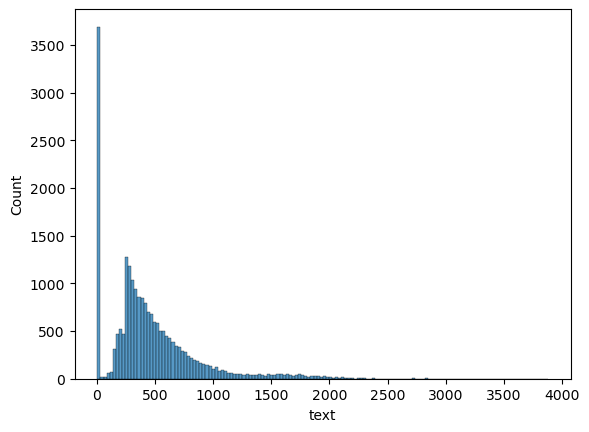

In [27]:
print(ratings_matched['text'][:5])
print(len(ratings_matched['text'][0]))
print(np.mean(ratings_matched['text'].apply(lambda row : len(str(row)))))
sns.histplot(data = ratings_matched['text'].apply(lambda row : len(str(row))))
plt.show()

0     a)  Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...
1    Can. Weak and watery, not the best beer of the...
2    Bottle @ One Pint Pub, Helsinki. Originally ra...
3    Draught @Â Pikkulintu, Helsinki, Finland. A pr...
4    750ml bottleBottling date: 2011/02/17 - Pours ...
Name: text.1, dtype: object
1263
480.8109633946458


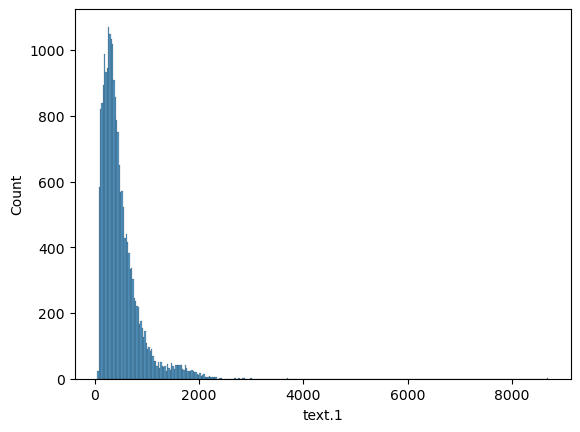

In [28]:
print(ratings_matched['text.1'][:5])
print(len(ratings_matched['text.1'][0]))
print(np.mean(ratings_matched['text.1'].apply(lambda row : len(str(row)))))
sns.histplot(data = ratings_matched['text.1'].apply(lambda row : len(str(row))))
plt.show()

In [30]:
ratings_1text = ratings_matched[np.where(str(ratings_matched['text']) == 0)]
ratings_1text.head()

C:\Users\Maxime\AppData\Local\Temp\ipykernel_21764\3087548320.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  ratings_1text = ratings_matched[np.where(str(ratings_matched['text']) == 0)]


InvalidIndexError: (array([], dtype=int64),)

- clean the sentences
- compare sentences between the 2 websites for each beer